## 1. Imprort data & packages

In [1]:
%run C:/Users/HSS/dd.py
print('done')

done


In [2]:
churn = pd.read_csv('C:/Users/HSS/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)
data = churn.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Data Description 
- `customerID`: Customer ID 고객 ID
- `gender`: Whether the customer is a male or a female 고객 성별
- `SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0) 65세 이상(경로)
- `Partner`: Whether the customer has a partner or not (Yes, No) 배우자 여부
- `Dependents`: Whether the customer has dependents or not (Yes, No) 자녀 여부
- `tenure`: Number of months the customer has stayed with the company 계약 기간
- `PhoneService`: Whether the customer has a phone service or not (Yes, No) 핸드폰 서비스 사용 여부
- `MultipleLines`: Whether the customer has multiple lines or not (Yes, No, No phone service)
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No) 인터넷 서비스 종류 (DSL, Fiber, optic, No)
- `OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service) (온라인보안서비스가입여부)
- `OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service) (온라인백업서비스가입여부)
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service) (기기보호)
- `TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service)
- `StreamingMovie`: Whether the customer has streaming movies or not (Yes, No, No internet service)
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year)
- `PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No)
- `PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges`: The amount charged to the customer monthly
- `TotalCharges`: The total amount charged to the customer
- `ChurnWhether`: the customer churned or not (Yes or No)

### - 데이터 전처리
- Partener, Dependents 등 Yes or No로 되어 있는 데이터를 1과 0으로 변경
- Churn과 Customer 세트 분리하기


In [4]:
# Yes, NO ONE HOT 
data = churn.copy()
columns = data.columns.values
y_n_columns = columns[[3,4,6,9,10,11,12,13,14,16,20]]
y_n_columns

array(['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn'], dtype=object)

In [5]:
for i in y_n_columns:
    data[i] = data[i].apply(lambda x: 0 if x == 'No' else 1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors= 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(13), object(6)
me

## Nan 처리
- `TotalCharges` 칼럼에 11개 Nan 존재
- 모두 `Tenure`: 0, `TotalCharges` : Nan, `MonthlyCharges`가 존재했기 때문에 11개의 Nan 값을 `MohtnlyCharges`로 대체

In [7]:
print(sum(np.isnan(data['TotalCharges'])))
idx = np.isnan(data['TotalCharges'])
data['TotalCharges'][idx] = data['MonthlyCharges'][idx]

11


In [8]:
# Nan 제거 완료
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(13), object(6)
me

In [9]:
churns = data[data['Churn'] == 1]
customers = data[data['Churn'] == 0]

## 대략적인 데이터 경향

- `Churn` 과 `tenure`가 가장 밀접한 선형 관계를 갖고 있다.
- `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` 가 같은 방향으로 움직인다. 

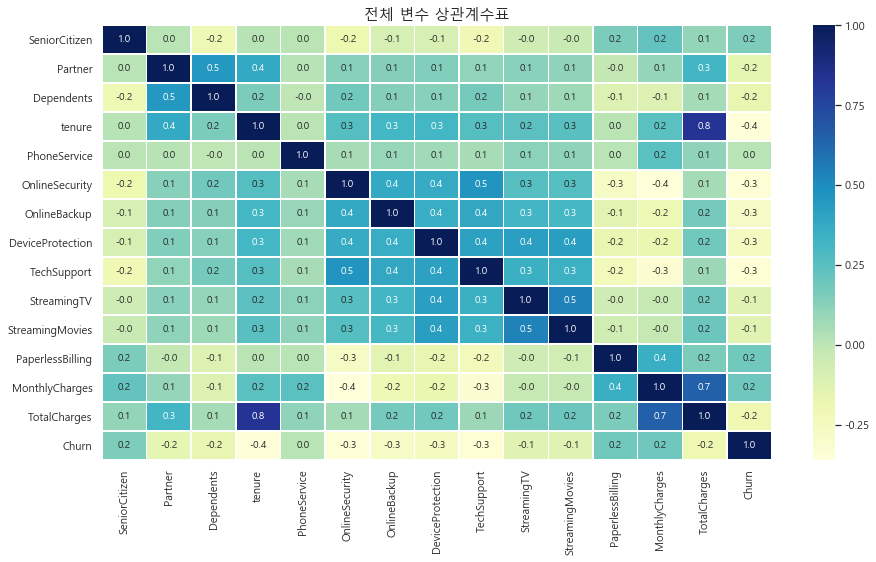

In [31]:
plt.figure(figsize = (15,8))
plt.title('전체 변수 상관계수표', fontsize = 15)
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap = 'YlGnBu',fmt= '.1f')
# RdYlGn_r, YlGnBu
plt.show()

## 01. Tenure

- 전체 고객의 Tenure 평균, 3분위, 최소계약기간, 최장계약기간, 분포
- 이탈 고객의 Tenure 평균, 3분위, 최소계약기간, 최장계약기간, 분포
- 유지 고객의 Tenure 평균, 3분위, 최소계약기간, 최장계약기간, 분포




- `이탈 고객의 특징`: Tenure 기간이 상대적으로 짧다.

In [11]:
print(' \n [전체 고객]의 평균 계약 기간은 {}개월이고, 75%의 사람들은 {}개월 이하 동안 해당 통신사를 사용했습니다. \n 최단 계약 기간은 {}개월인 반면, 최장 계약 기간은 무려 {}개월입니다. '
     .format(int(data['tenure'].mean()), int(data['tenure'].quantile(0.75)), data['tenure'].min(), data['tenure'].max()))

print(' \n [이탈 고객]의 평균 계약 기간은 {}개월이고, 75%의 사람들은 {}개월 이하 동안 해당 통신사를 사용했습니다. \n 최단 계약 기간은 {}개월인 반면, 최장 계약 기간은 무려 {}개월입니다. '
     .format(int(churns['tenure'].mean()), int(churns['tenure'].quantile(0.75)), churns['tenure'].min(), churns['tenure'].max()))

print(' \n [유지 고객]의 평균 계약 기간은 {}개월이고, 75%의 사람들은 {}개월 이하 동안 해당 통신사를 사용했습니다. \n 최단 계약 기간은 {}개월인 반면, 최장 계약 기간은 무려 {}개월입니다. '
     .format(int(customers['tenure'].mean()), int(customers['tenure'].quantile(0.75)), customers['tenure'].min(), customers['tenure'].max()))

 
 [전체 고객]의 평균 계약 기간은 32개월이고, 75%의 사람들은 55개월 이하 동안 해당 통신사를 사용했습니다. 
 최단 계약 기간은 0개월인 반면, 최장 계약 기간은 무려 72개월입니다. 
 
 [이탈 고객]의 평균 계약 기간은 17개월이고, 75%의 사람들은 29개월 이하 동안 해당 통신사를 사용했습니다. 
 최단 계약 기간은 1개월인 반면, 최장 계약 기간은 무려 72개월입니다. 
 
 [유지 고객]의 평균 계약 기간은 37개월이고, 75%의 사람들은 61개월 이하 동안 해당 통신사를 사용했습니다. 
 최단 계약 기간은 0개월인 반면, 최장 계약 기간은 무려 72개월입니다. 


## 01-1. 전체 고객의 계약 기간 분포

#  
  
#### - 계약 기간 10개월 미만 구간에서 유지고객과 이탈고객의 차이가 가장 크게 두드러졌다.  


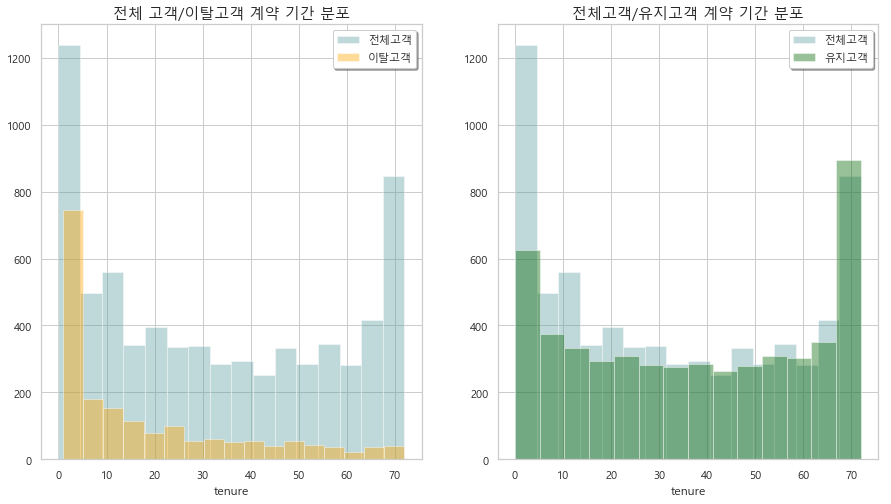

In [12]:
plt.figure(figsize = (15,8))
plt.subplot(121)

plt.title('전체 고객/이탈고객 계약 기간 분포', fontsize = 15)
sns.distplot(data['tenure'], color = 'cadetblue', kde = False)
sns.distplot(churns['tenure'], color = 'orange', kde = False)
plt.legend(['전체고객', '이탈고객'], shadow = True)
# sns.distplot(customers['tenure'], color = 'orange', kde = False)

plt.subplot(122)
plt.title('전체고객/유지고객 계약 기간 분포', fontsize = 15)
sns.distplot(data['tenure'], color = 'cadetblue', kde = False)
# sns.distplot(churns['tenure'], color = 'orange', kde = False)
sns.distplot(customers['tenure'], color = 'darkgreen', kde = False)
plt.legend(['전체고객', '유지고객'], shadow = True)

plt.show()

In [13]:
print('이탈 고객 {}명 중 {}명({}%)가 계약 10개월 이내 서비스를 해지했다.'.format 
      (
      len(churns),
      len(churns[churns['tenure']<=10]), 
      round(len(churns[churns['tenure']<=10])/len(churns)*100,1))
     )

이탈 고객 1869명 중 968명(51.8%)가 계약 10개월 이내 서비스를 해지했다.


### Q1. 이탈 고객은 왜 이렇게 빨리 계약을 해지했을까?
- 이탈의 징후는 무엇인가? ex(통화료, 서비스 불만족, 계약 조건 등)
- 데이터셋에서 발견 가능한 징후는 무엇일까?

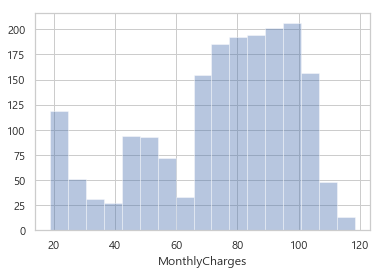

In [14]:
# sns.distplot(churns['TotalCharges'], kde = False)
sns.distplot(churns['MonthlyCharges'], kde = False)

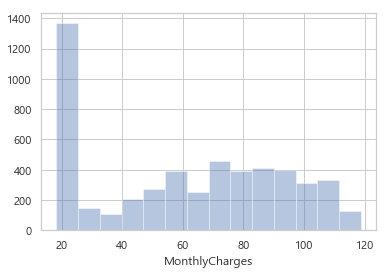

In [15]:
sns.distplot(customers['MonthlyCharges'], kde = False)

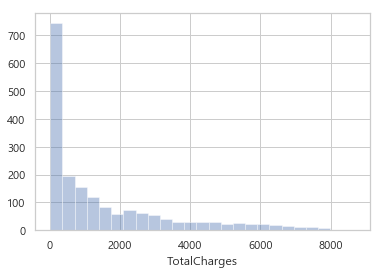

In [16]:
sns.distplot(churns['TotalCharges'], kde = False)

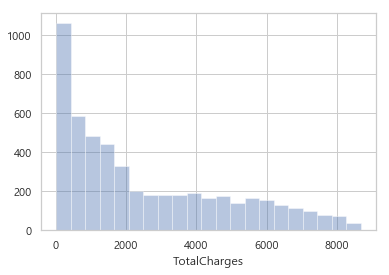

In [17]:
sns.distplot(customers['TotalCharges'], kde = False)

In [23]:
early_out = churns[churns['tenure']<=10]

In [24]:
early_out.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.0
mean,0.209711,0.228306,0.139463,3.467975,0.896694,0.172521,0.241736,0.257231,0.181818,0.380165,0.378099,0.711777,65.861777,247.494060,1.0
std,0.407313,0.419958,0.346608,2.850463,0.304515,0.378028,0.428356,0.437334,0.385894,0.485678,0.485163,0.453170,23.976168,246.245436,0.0
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,18.850000,1.0
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.162500,70.087500,1.0
50%,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,72.525000,144.550000,1.0
75%,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,84.362500,362.787500,1.0
max,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,110.100000,1081.450000,1.0


In [33]:
data.describe() - early_out.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,-0.047564,0.254727,0.160125,28.903173,0.006472,0.330816,0.319815,0.303325,0.325068,0.220857,0.226473,-0.119558,-1.100084,2032.304932,-0.734630
std,-0.038701,0.079790,0.111502,21.709018,-0.008763,0.121997,0.067876,0.059021,0.114094,0.004045,0.003814,0.038287,6.113879,2020.484733,0.441561
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.600000,-0.050000,-1.000000
25%,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.662500,328.462500,-1.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.175000,1250.000000,-1.000000
75%,0.000000,1.000000,1.000000,50.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.487500,3423.812500,0.000000
max,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.650000,7603.350000,0.000000


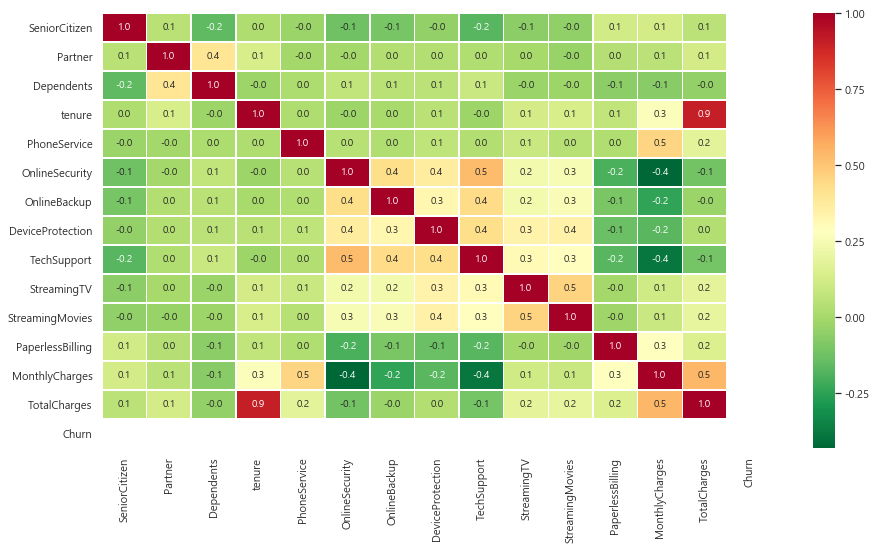

In [28]:
plt.figure(figsize = (15,8))
sns.heatmap(early_out.corr(), annot=True, cmap  = 'RdYlGn_r',linewidths=.5, fmt= '.1f')
plt.show()


## 같은 성격의 보장류 서비스, 스트리밍 서비스 등의 처리 방법
- 선택1 : 병합해 하나의 칼럼으로 만든다.
- 선택2 : 그대로 둔다.

## 훈련 데이터, 테스트 데이터 분리

In [18]:
customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
6,1452-KIOVK,Male,0,0,1,22,1,Yes,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,0,0,10,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
9,6388-TABGU,Male,0,0,1,62,1,No,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0
10,9763-GRSKD,Male,0,1,1,13,1,No,DSL,1,0,0,0,0,0,Month-to-month,1,Mailed check,49.95,587.45,0
11,7469-LKBCI,Male,0,0,0,16,1,No,No,1,1,1,1,1,1,Two year,0,Credit card (automatic),18.95,326.80,0
12,8091-TTVAX,Male,0,1,0,58,1,Yes,Fiber optic,0,0,1,0,1,1,One year,0,Credit card (automatic),100.35,5681.10,0
14,5129-JLPIS,Male,0,0,0,25,1,No,Fiber optic,1,0,1,1,1,1,Month-to-month,1,Electronic check,105.50,2686.05,0


### - 데이터 전처리
- Partener, Dependents 등 Yes or No로 되어 있는 데이터를 1과 0으로 변경
- Churn과 Customer 세트 분리하기


### Churn과 Customer 의 유의미한 차이가 있을까

In [19]:
len(churns), len(customers)

(1869, 5174)

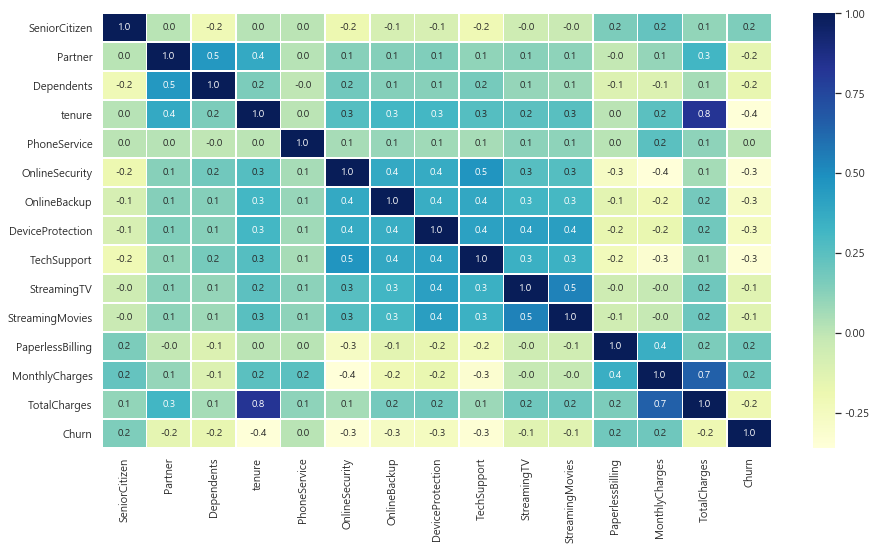

In [20]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap = 'YlGnBu',fmt= '.1f')
plt.show()

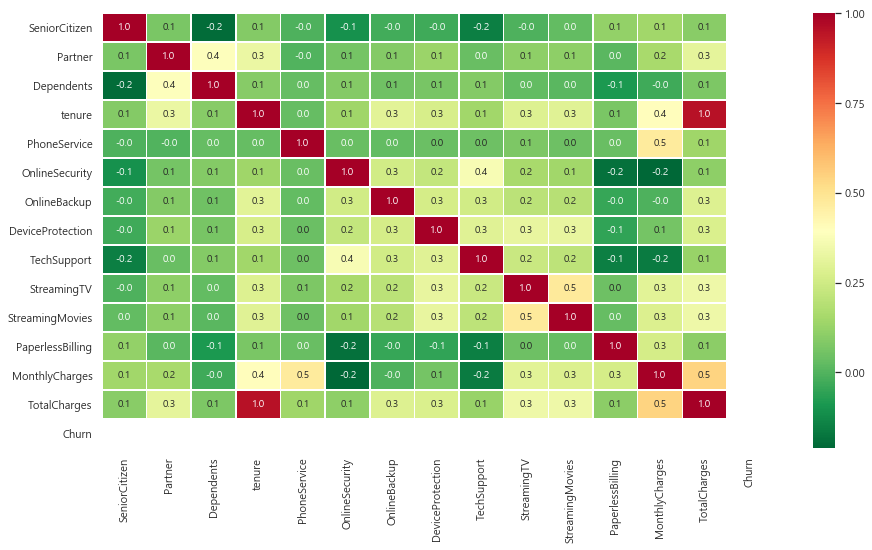

In [21]:
plt.figure(figsize = (15,8))
sns.heatmap(churns.corr(), annot=True, cmap  = 'RdYlGn_r',linewidths=.5, fmt= '.1f')
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(13), object(6)
me